In [162]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
import itertools
%matplotlib inline
import random

In [3]:
## Consider database of fruits

fruits = {
    'Merry': [
        ('apple', 5),
        ('orange', 3),
    ],
    'John': [
        ('berries', 1),
        ('orange', 10),
    ],
    'Tom' : [
        ('peaches', 2),
    ],
}
print fruits.items()
print fruits

[('John', [('berries', 1), ('orange', 10)]), ('Merry', [('apple', 5), ('orange', 3)]), ('Tom', [('peaches', 2)])]
{'John': [('berries', 1), ('orange', 10)], 'Merry': [('apple', 5), ('orange', 3)], 'Tom': [('peaches', 2)]}


EX. 1

In [15]:
list(filter(lambda x : (x[0] in ["Merry", "Tom"]), fruits.items()))

[('Merry', [('apple', 5), ('orange', 3)]), ('Tom', [('peaches', 2)])]

EX. 2

In [114]:
with open("radishsurvey.txt") as f:
    ll = f.readlines()
ll = list(map(lambda x : x.split(" - "), ll))

('champion', 76) ('red king', 56)


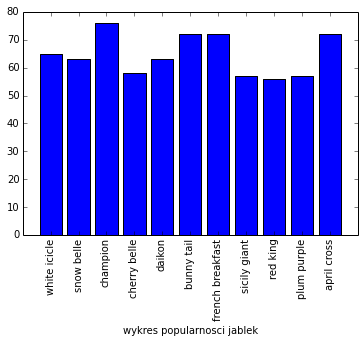

In [116]:
varieties = map(lambda x : x[1], ll)
varieties = map(lambda x : re.sub(' +',' ',x), varieties)
varieties = map(lambda x : re.sub('^ ','',x), varieties)
varieties = map(lambda x : re.sub(' *\n','',x), varieties)
varieties = map(lambda x : x.lower(), varieties)

c = Counter(varieties).items()
winner = max(c, key=lambda x : x[1])
loser = min(c, key=lambda x : x[1])

print winner, loser

fig, ax = plt.subplots()
ax.bar(np.arange(0, len(c), 1), map(lambda x : x[1], c), align="center")
ax.set_xlim((-1, len(c)))
ax.xaxis.set_ticks(np.arange(0, len(c), 1))
ax.xaxis.set_ticklabels(list(map(lambda x : x[0], c)), rotation="vertical")
ax.xaxis.set_label_text("wykres popularnosci jablek")

plt.show()

In [117]:
#czy ktos glosowal 2 razy
names = sorted(map(lambda x : x[0], ll))
the_same = map((lambda x : (x[0] == x[1])), zip(names[:-1], names[1:]))
the_same = reduce(lambda x, y : (x or y), the_same)
print the_same

True


EX. 3

In [232]:
class Board(object):
    def __init__(self, side=3, first_player='X'):
        self.board = np.zeros((side, side))
        self.side = side
        self.act_player = 1
        self.free = set()
        
        if first_player == 'O':
            self.act_player = -1
        
        winning_lines = []
        diag1 = []
        diag2 = []
        for i in xrange(self.side):
            diag1.append((i, i))
            diag2.append((i, self.side - i - 1))
        
        winning_lines.append(diag1)
        winning_lines.append(diag2)
        for i in xrange(self.side):
            col = []
            for j in xrange(self.side):
                col.append((i, j))
            row = []
            for j in xrange(self.side):
                row.append((j, i))
            winning_lines.append(col)
            winning_lines.append(row)
            
        for i, j in itertools.product(range(side), range(side)):
            self.free.add((i, j))
        
        self.wl = winning_lines
        
    def play_at(self, x, y):
        if (x, y) not in self.free:
            raise Exception("pole jest zajete")
        self.free.remove((x, y))
        self.board[x, y] = self.act_player
        self.act_player = -self.act_player
        return self
        
    def score(self):
        for w in self.wl:
            s = sum(self.board[x[0],x[1]] for x in w)
            if s == self.side:
                return 1
            if s + self.side == 0:
                return -1
        return 0
    
    def play_random_once(self):
        if len(self.free) == 0:
            return False
        if self.score() != 0:
            return False
        x, y = random.sample(self.free, 1)[0]
        self.free.remove((x, y))
        self.board[x, y] = self.act_player
        self.act_player = -self.act_player
        return True
        
    def playout_random(self):
        x = True
        while x is True:
            x = self.play_random_once()
        return self

In [250]:
# This code should work
board = Board(3, 'X')
board_2 = board.play_at(0, 0)

results = []
for _ in range(100): # _ is just a dummy variable
    board = Board(3, 'X')
    results.append(board.playout_random().score() == -1) # has "O" won?

prob_winning = sum(results)/float(len(results))
    
print "Winning probability of O is {}".format(prob_winning)

Winning probability of O is 0.31


EX. 4

Calculate how many apples has Merry and John using chain of:

filter: dict -> list of tuples ('name', list of tuples)

map: list of tuples ('name', list of tuples) -> list of list of tuples

chain: list of list of tuples -> list of tuples

map: list of tuples -> list of numbers

reduce: list of numbers -> single number

In [158]:
f1 = filter(lambda x : (x[0] in ["Merry", "John"]), fruits.items())
print f1
f2 = map(lambda x : x[1], f1)
print f2
f3 = list(itertools.chain(*f2))
print f3
f4 = map(lambda x : x[1] if x[0] == 'apple' else 0, f3)
print f4
f5 = reduce(lambda x, y: x+y, f4)
print f5

[('John', [('berries', 1), ('orange', 10)]), ('Merry', [('apple', 5), ('orange', 3)])]
[[('berries', 1), ('orange', 10)], [('apple', 5), ('orange', 3)]]
[('berries', 1), ('orange', 10), ('apple', 5), ('orange', 3)]
[0, 0, 5, 0]
5


EX. 5

In [138]:
def natural_numbers(k=0):
    i = 0
    while True:
        yield i + k
        i += 1

import types
print isinstance(natural_numbers(), types.GeneratorType)

# Should print 20 times True
for i, n in enumerate(natural_numbers()):
    print i, i == n
    if i > 20:
        break
        
# Should print 20 times True
for i, n in enumerate(natural_numbers(1)):
    print i, i+1 == n
    if i > 20:
        break

True
0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True


In [140]:
def factorials():
    i = 1
    cnt = 2
    while True:
        yield i
        i = i * cnt
        cnt += 1
    pass

import types
print isinstance(factorials(), types.GeneratorType)

results = [1, 2, 6, 24, 120, 720, 5040]
for truth, answer in zip(results, factorials()):
    print(truth, truth == answer)

True
(1, True)
(2, True)
(6, True)
(24, True)
(120, True)
(720, True)
(5040, True)


EX. 6

In [131]:
"""to_sort = [
        ("Tom",19,80),
        ("John",20,90),
        ("Jony",17,91),
        ("Jony",17,93),
        ("Json",21,85)]"""

to_sort = []
n = int(raw_input("podaj liczbe tupli"))
for _ in xrange(n):
    s = raw_input("podaj tuple (bez spacji)")
    s = s.split(",")
    to_sort.append((s[0], int(s[1]), int(s[2])))

sorted(to_sort, lambda x, y: (-1 if x[0] < y[0] else (1 if x[0] > y[0] else 
                             (-1 if x[1] < y[1] else (1 if x[1] > y[1] else 
                             (-1 if x[2] < y[2] else (1 if x[2] > y[2] else 0)))))))

podaj liczbe tupli4
podaj tuple (bez spacji)jan,2,6
podaj tuple (bez spacji)karol,-1,122
podaj tuple (bez spacji)jan,2,4
podaj tuple (bez spacji)jan,1,1000


[('jan', '1', '1000'),
 ('jan', '2', '4'),
 ('jan', '2', '6'),
 ('karol', '-1', '122')]